In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fpath = '/content/drive/Shareddrives/BANA Final Project/Kaggle Data/'

In [ ]:
df = pd.read_csv(fpath+'analyst_ratings_processed.csv')
df.drop(df.columns[0], axis=1,inplace= True)
df.head()

,title,date,stock
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


In [ ]:
df = df[(df.date != 'AAN') | (df.date != 'AAP') ]

In [ ]:
def getNulls(data):
    
    total = data.isnull().sum()
    percent = data.isnull().sum() / data.isnull().count()
    missing_data = pd.concat([total, percent], axis = 1, keys = ['total', 'precent'])
    
    return missing_data

In [ ]:
missing_data_train = getNulls(df)
missing_data_train.head(df.shape[1]).T

,title,date,stock
total,0.0,1289.00000,2578.000000
precent,0.0,0.00092,0.001841


In [ ]:
df = df.dropna()

In [ ]:
df['date'] = df['date'].str.split(' ', expand=True)[0].values
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')

In [ ]:
stocksDF = df[df['stock'].isin([ 'NFLX', 'MSFT', 'TWTR', 'GOOGL', 'FB', 'TSLA', 'AAPL'])]
#stocksDF = df[df['stock'].isin([ 'NFLX', 'TSLA', 'MRK','KO','MS','QCOM'])]
stocksDF

,title,date,stock,month_year
3668,Tech Stocks And FAANGS Strong Again To Start D...,2020-06-10,AAPL,2020-06
3669,10 Biggest Price Target Changes For Wednesday,2020-06-10,AAPL,2020-06
3670,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",2020-06-10,AAPL,2020-06
3671,"Deutsche Bank Maintains Buy on Apple, Raises P...",2020-06-10,AAPL,2020-06
3672,Apple To Let Users Trade In Their Mac Computer...,2020-06-10,AAPL,2020-06
...,...,...,...,...
1262189,Scientists Funded By Chan Zuckerberg Foundatio...,2020-06-08,TWTR,2020-06
1262190,"Barron's Picks And Pans: Sysco, Twitter, Zoom ...",2020-06-06,TWTR,2020-06
1262191,Shares of several communication companies are ...,2020-06-05,TWTR,2020-06
1262192,Twitter Disables Trump Campaign Tribute to Geo...,2020-06-05,TWTR,2020-06


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [ ]:
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return  TextBlob(text).sentiment.polarity
  
#Create a function to get the sentiment scores (using Sentiment Intensity Analyzer)
def getSIA(text):
  sia = SentimentIntensityAnalyzer()
  sentiment = sia.polarity_scores(text)
  return sentiment

In [ ]:
stocksDF['Subjectivity'] = stocksDF['title'].apply(getSubjectivity)
stocksDF['Polarity'] = stocksDF['title'].apply(getPolarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#Hugging Face Sentiment Score Creation

In [ ]:
!pip install datasets transformers[sentencepiece]

     |████████████████████████████████| 325 kB 5.3 MB/s 
     |████████████████████████████████| 4.0 MB 24.2 MB/s 
     |████████████████████████████████| 77 kB 5.6 MB/s 
     |████████████████████████████████| 136 kB 36.3 MB/s 
     |████████████████████████████████| 212 kB 40.5 MB/s 
     |████████████████████████████████| 1.1 MB 37.4 MB/s 
     |████████████████████████████████| 127 kB 36.6 MB/s 
     |████████████████████████████████| 144 kB 37.8 MB/s 
     |████████████████████████████████| 271 kB 13.0 MB/s 
     |████████████████████████████████| 94 kB 1.7 MB/s 
     |████████████████████████████████| 6.6 MB 15.3 MB/s 
     |████████████████████████████████| 880 kB 15.8 MB/s 
     |████████████████████████████████| 596 kB 18.8 MB/s 
     |████████████████████████████████| 1.2 MB 40.8 MB/s 
     |████████████████████████████████| 96 kB 4.3 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.50-py3-none-any.whl size=895166 sha256=69a883f24e0e3070fff108f4552e548b626864714c

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

from bs4 import BeautifulSoup
import re
###Taken From Class
###We need to do some data cleaning!
###Ricky to the rescue...
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()



No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
data = stocksDF

In [ ]:
clean_titles =[]
for t in data.title:
  clean_titles.append(tweet_cleaner(t))

In [ ]:
th = classifier(clean_titles)
labels = pd.DataFrame.from_dict(th)

In [ ]:
data = data.reset_index()
labels = labels.reset_index()

In [ ]:
data1 = pd.merge(data, labels, left_index=True, right_index=True)

In [ ]:
data1.loc[data1['label'].isin(['NEGATIVE']), 'score'] = data1['score']*-1

In [ ]:
data2 = data1.groupby(['stock', 'date'], as_index=False)[['score']].sum()

In [ ]:
data2 = data2.rename(columns = {'score': 'HF_score'})

In [ ]:
stocksDF = pd.merge(stocksDF, data2, on = ['stock','date' ])

#End of Hugging Face Sentiment Inclusion

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.update(['NFLX', 'TSLA', 'MRK','KO','MS','QCOM']) #adding to stopwords

In [ ]:
titles = pd.Series(clean_titles).str.cat(sep=' ')

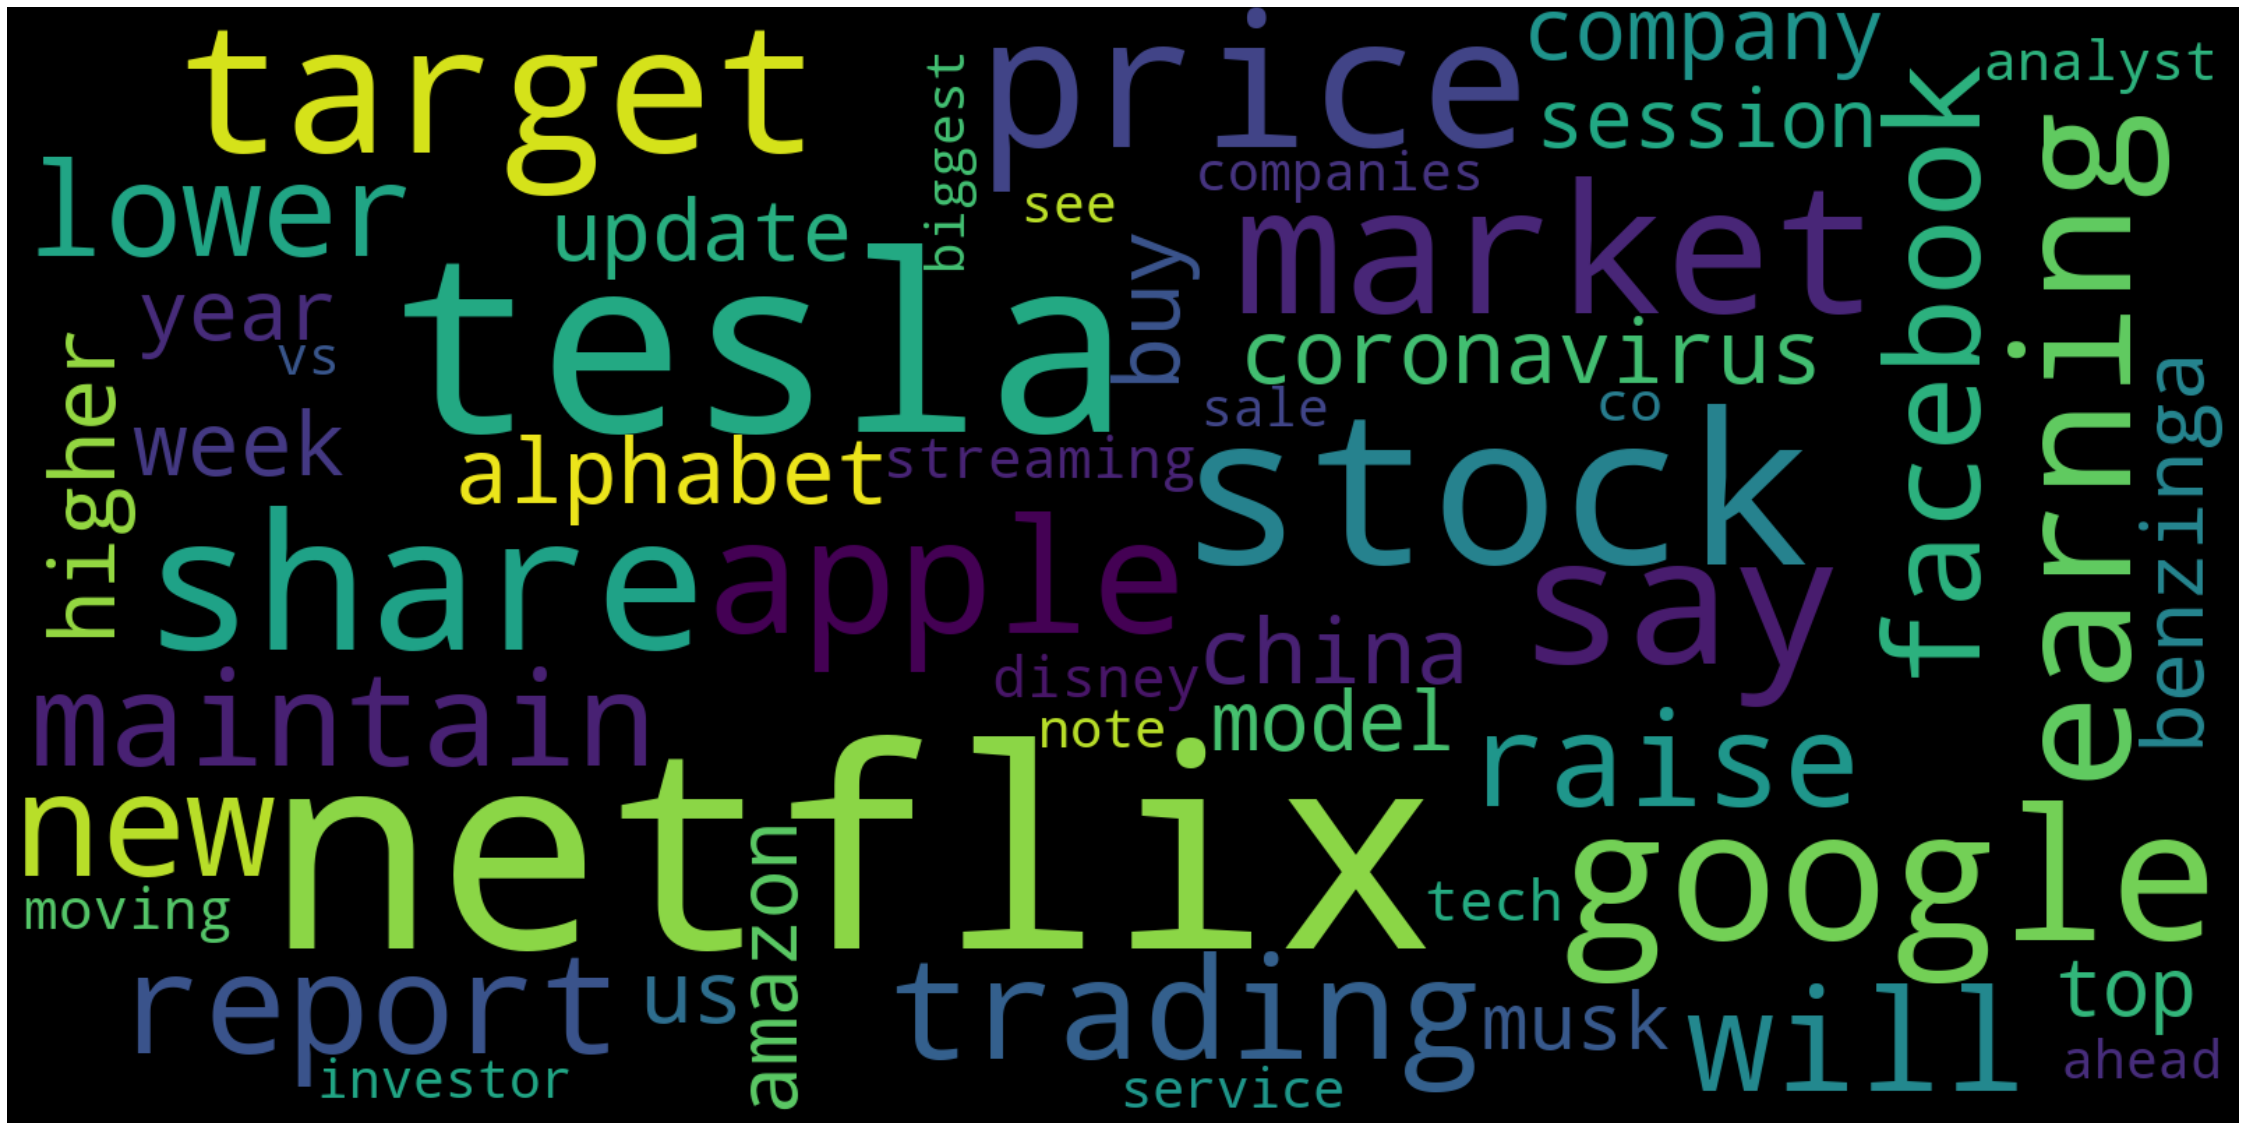

In [ ]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(titles)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show() #showing wordcloud

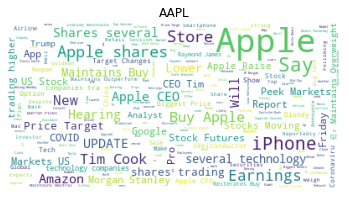

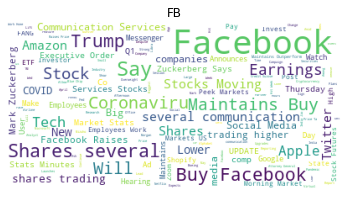

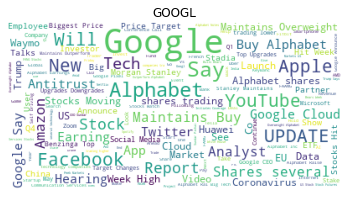

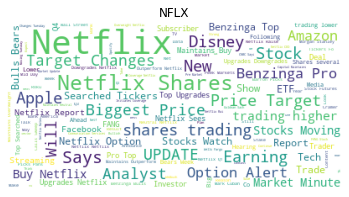

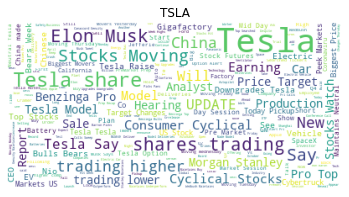

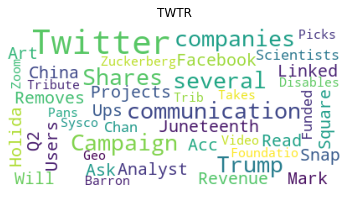

In [ ]:
# wordcloud by each stock
for x in stocksDF.stock.unique():
	wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords,
                   max_font_size=40, random_state=42)
	wc.generate(stocksDF.title[stocksDF.stock == x].to_string())
	plt.imshow(wc)
	plt.title(x)
	plt.axis("off")
	plt.show()

In [ ]:
stocksDF

,title,date,stock,month_year,Subjectivity,Polarity,HF_score
0,Tech Stocks And FAANGS Strong Again To Start D...,2020-06-10,AAPL,2020-06,0.733333,0.433333,2.161310
1,10 Biggest Price Target Changes For Wednesday,2020-06-10,AAPL,2020-06,0.000000,0.000000,2.161310
2,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",2020-06-10,AAPL,2020-06,0.500000,0.500000,2.161310
3,"Deutsche Bank Maintains Buy on Apple, Raises P...",2020-06-10,AAPL,2020-06,0.000000,0.000000,2.161310
4,Apple To Let Users Trade In Their Mac Computer...,2020-06-10,AAPL,2020-06,0.000000,0.000000,2.161310
...,...,...,...,...,...,...,...
7387,Scientists Funded By Chan Zuckerberg Foundatio...,2020-06-08,TWTR,2020-06,0.288889,-0.155556,-0.998423
7388,"Barron's Picks And Pans: Sysco, Twitter, Zoom ...",2020-06-06,TWTR,2020-06,0.500000,0.500000,-0.825550
7389,Shares of several communication companies are ...,2020-06-05,TWTR,2020-06,0.333333,0.170833,-0.988557
7390,Twitter Disables Trump Campaign Tribute to Geo...,2020-06-05,TWTR,2020-06,0.287500,-0.212500,-0.988557


In [ ]:
stocksDF.value_counts(['stock'])

stock
NFLX     3009
TSLA     1930
GOOGL    1585
AAPL      469
FB        389
TWTR       10
dtype: int64

In [ ]:
#Get the sentiment scores for each day
compound = []
neg = []
neu = []
pos = []
SIA = 0
for i in range(0, len(stocksDF['title'])):
  SIA = getSIA(stocksDF.iloc[i]['title'])
  compound.append(SIA['compound'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

In [ ]:
#Store the sentiment scores in the data frame
stocksDF['Compound'] =compound
stocksDF['Negative'] =neg
stocksDF['Neutral'] =neu
stocksDF['Positive'] = pos

In [ ]:
stocksDF

,title,date,stock,month_year,Subjectivity,Polarity,HF_score,Compound,Negative,Neutral,Positive
0,Tech Stocks And FAANGS Strong Again To Start D...,2020-06-10,AAPL,2020-06,0.733333,0.433333,2.161310,0.5574,0.000,0.705,0.295
1,10 Biggest Price Target Changes For Wednesday,2020-06-10,AAPL,2020-06,0.000000,0.000000,2.161310,0.0000,0.000,1.000,0.000
2,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",2020-06-10,AAPL,2020-06,0.500000,0.500000,2.161310,0.2023,0.000,0.899,0.101
3,"Deutsche Bank Maintains Buy on Apple, Raises P...",2020-06-10,AAPL,2020-06,0.000000,0.000000,2.161310,0.0000,0.000,1.000,0.000
4,Apple To Let Users Trade In Their Mac Computer...,2020-06-10,AAPL,2020-06,0.000000,0.000000,2.161310,0.3818,0.000,0.852,0.148
...,...,...,...,...,...,...,...,...,...,...,...
7387,Scientists Funded By Chan Zuckerberg Foundatio...,2020-06-08,TWTR,2020-06,0.288889,-0.155556,-0.998423,-0.2500,0.131,0.795,0.074
7388,"Barron's Picks And Pans: Sysco, Twitter, Zoom ...",2020-06-06,TWTR,2020-06,0.500000,0.500000,-0.825550,0.0000,0.000,1.000,0.000
7389,Shares of several communication companies are ...,2020-06-05,TWTR,2020-06,0.333333,0.170833,-0.988557,0.8402,0.000,0.679,0.321
7390,Twitter Disables Trump Campaign Tribute to Geo...,2020-06-05,TWTR,2020-06,0.287500,-0.212500,-0.988557,-0.2960,0.167,0.833,0.000


In [ ]:
monthlyStock = stocksDF.groupby(['stock','month_year'],as_index=False)[['HF_score', 'Subjectivity','Polarity','Compound','Negative','Neutral','Positive']].mean()
DailyStock = stocksDF.groupby(['stock','date'],as_index=False)[['HF_score', 'Subjectivity','Polarity','Compound','Negative','Neutral','Positive']].mean()

In [ ]:
monthlyStock

,stock,month_year,HF_score,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,AAPL,2020-03,-4.353681,0.212477,0.046795,0.018329,0.074592,0.847969,0.077438
1,AAPL,2020-04,-3.482514,0.233089,0.066675,0.114632,0.038378,0.878012,0.083610
2,AAPL,2020-05,-3.807266,0.218935,0.045297,0.066032,0.043512,0.877382,0.079130
3,AAPL,2020-06,-1.515296,0.255652,0.065128,0.018810,0.068000,0.848173,0.083808
4,FB,2020-02,-1.517067,0.190292,0.027581,0.065381,0.052963,0.845852,0.101185
...,...,...,...,...,...,...,...,...,...
88,TSLA,2020-03,-4.765362,0.252669,0.044087,0.027089,0.060325,0.869234,0.070401
89,TSLA,2020-04,-2.797577,0.223994,0.058637,0.074487,0.029931,0.902867,0.067197
90,TSLA,2020-05,-2.573425,0.234340,0.059751,0.056904,0.040071,0.894089,0.065845
91,TSLA,2020-06,-1.017323,0.295712,0.065210,0.119905,0.031226,0.883595,0.085202


In [ ]:
monthlyStock


,stock,month_year,HF_score,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,AAPL,2020-03,-4.353681,0.212477,0.046795,0.018329,0.074592,0.847969,0.077438
1,AAPL,2020-04,-3.482514,0.233089,0.066675,0.114632,0.038378,0.878012,0.083610
2,AAPL,2020-05,-3.807266,0.218935,0.045297,0.066032,0.043512,0.877382,0.079130
3,AAPL,2020-06,-1.515296,0.255652,0.065128,0.018810,0.068000,0.848173,0.083808
4,FB,2020-02,-1.517067,0.190292,0.027581,0.065381,0.052963,0.845852,0.101185
...,...,...,...,...,...,...,...,...,...
88,TSLA,2020-03,-4.765362,0.252669,0.044087,0.027089,0.060325,0.869234,0.070401
89,TSLA,2020-04,-2.797577,0.223994,0.058637,0.074487,0.029931,0.902867,0.067197
90,TSLA,2020-05,-2.573425,0.234340,0.059751,0.056904,0.040071,0.894089,0.065845
91,TSLA,2020-06,-1.017323,0.295712,0.065210,0.119905,0.031226,0.883595,0.085202


In [ ]:
DailyStock

,stock,date,HF_score,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,AAPL,2020-03-09,-2.695928,0.255556,-0.155556,-0.302067,0.162333,0.812000,0.025333
1,AAPL,2020-03-10,-1.806887,0.214542,0.021708,-0.090787,0.124375,0.808125,0.067500
2,AAPL,2020-03-11,-11.894405,0.287707,0.018624,-0.023850,0.087071,0.826714,0.086214
3,AAPL,2020-03-12,-1.083537,0.517452,-0.083048,-0.207240,0.217200,0.688400,0.094400
4,AAPL,2020-03-13,-4.388841,0.164050,0.069215,-0.023191,0.083545,0.846545,0.069909
...,...,...,...,...,...,...,...,...,...
1850,TWTR,2020-06-05,-0.988557,0.303241,-0.065741,0.000633,0.131000,0.762000,0.107000
1851,TWTR,2020-06-06,-0.825550,0.500000,0.500000,0.000000,0.000000,1.000000,0.000000
1852,TWTR,2020-06-08,-0.998423,0.288889,-0.155556,-0.250000,0.131000,0.795000,0.074000
1853,TWTR,2020-06-10,0.006498,0.033333,0.016667,0.354800,0.000000,0.802000,0.198000


In [ ]:
stocksDF.value_counts(['stock'])

stock
NFLX     3009
TSLA     1930
GOOGL    1585
AAPL      469
FB        389
TWTR       10
dtype: int64

In [ ]:
DailyStock_hf=DailyStock.filter(["stock", "date", "HF_score", "Subjectivity", "Polarity"])
DailyStock_vader=DailyStock.filter(["stock", "date", "Subjectivity", "Polarity", "Compound", "Negative", "Neutral", "Positive"])

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 11.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
tickers = ['NFLX', 'MSFT', 'TWTR', 'GOOGL', 'FB', 'TSLA', 'AAPL']

for eachCompany in tickers:
    #Dynamically create Data frames
    vars()[eachCompany] = yf.download([eachCompany], start="2017-01-01", end="2020-03-31", group_by = 'ticker').reset_index()

#data1 = yf.download('NFLX', start="2017-01-01", end="2020-03-31", group_by = 'ticker')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
NFLX

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5771800
...,...,...,...,...,...,...,...
810,2020-03-24,369.989990,372.929993,353.029999,357.320007,357.320007,11638700
811,2020-03-25,361.019989,362.000000,339.170013,342.390015,342.390015,8767200
812,2020-03-26,344.000000,363.839996,341.730011,362.989990,362.989990,7229600
813,2020-03-27,359.089996,368.559998,353.000000,357.119995,357.119995,7948800


In [ ]:
NFLX['stock'] = 'NFLX'
MSFT['stock'] = 'MSFT'
TWTR['stock'] = 'TWTR'
GOOGL['stock'] = 'GOOGL'
FB['stock'] = 'FB'
TSLA['stock'] = 'TSLA'
AAPL['stock'] = 'AAPL'
#MRK['stock'] = 'MRK'
#KO['stock'] = 'KO'
#MS['stock'] = 'MS'
#QCOM['stock'] = 'QCOM'

In [ ]:
all_stocks = NFLX.append([MSFT, TWTR, GOOGL, FB, TSLA, AAPL], ignore_index=True)
all_stocks.to_csv('all_stocks')
all_stocks

,Date,Open,High,Low,Close,Adj Close,Volume,stock
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,NFLX
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,NFLX
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,NFLX
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,NFLX
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5771800,NFLX
...,...,...,...,...,...,...,...,...
5700,2020-03-24,59.090000,61.922501,58.575001,61.720001,60.883400,287531200,AAPL
5701,2020-03-25,62.687500,64.562500,61.075001,61.380001,60.548000,303602000,AAPL
5702,2020-03-26,61.630001,64.669998,61.590000,64.610001,63.734226,252087200,AAPL
5703,2020-03-27,63.187500,63.967499,61.762501,61.935001,61.095478,204216800,AAPL


In [ ]:
all_stocks.value_counts(['stock'])

stock
AAPL     815
FB       815
GOOGL    815
MSFT     815
NFLX     815
TSLA     815
TWTR     815
dtype: int64

In [ ]:
all_stocks['Change'] = all_stocks['Adj Close'].shift(periods=1)
all_stocks.head(4)
#data1['Change'] = data1['Adj Close'].shift(periods=1)
#data1.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,stock,Change
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,NFLX,NaN
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,NFLX,127.489998
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,NFLX,129.410004
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,NFLX,131.809998


In [ ]:
all_stocks.drop(all_stocks.index[0], 
        axis=0, 
        inplace=True)
all_stocks.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume,stock,Change
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,NFLX,127.489998


In [ ]:
all_stocks['Label'] = np.where((all_stocks['Adj Close'] > all_stocks['Change']),1,0)
#dff['date'] = dff.Date
all_stocks.Date = all_stocks.Date.astype(str)
all_stocks.reset_index(drop = True, inplace = True)                    

In [ ]:
DailyStock = DailyStock.rename({'date': 'Date'}, axis=1)
DailyStock_hf = DailyStock_hf.rename({'date': 'Date'}, axis=1)
DailyStock_vader = DailyStock_vader.rename({'date': 'Date'}, axis=1)

In [ ]:
DailyStock_hf

,stock,Date,HF_score,Subjectivity,Polarity
0,AAPL,2020-03-09,-2.695928,0.255556,-0.155556
1,AAPL,2020-03-10,-1.806887,0.214542,0.021708
2,AAPL,2020-03-11,-11.894405,0.287707,0.018624
3,AAPL,2020-03-12,-1.083537,0.517452,-0.083048
4,AAPL,2020-03-13,-4.388841,0.164050,0.069215
...,...,...,...,...,...
1850,TWTR,2020-06-05,-0.988557,0.303241,-0.065741
1851,TWTR,2020-06-06,-0.825550,0.500000,0.500000
1852,TWTR,2020-06-08,-0.998423,0.288889,-0.155556
1853,TWTR,2020-06-10,0.006498,0.033333,0.016667


In [ ]:
DailyStock_vader

,stock,Date,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,AAPL,2020-03-09,0.255556,-0.155556,-0.302067,0.162333,0.812000,0.025333
1,AAPL,2020-03-10,0.214542,0.021708,-0.090787,0.124375,0.808125,0.067500
2,AAPL,2020-03-11,0.287707,0.018624,-0.023850,0.087071,0.826714,0.086214
3,AAPL,2020-03-12,0.517452,-0.083048,-0.207240,0.217200,0.688400,0.094400
4,AAPL,2020-03-13,0.164050,0.069215,-0.023191,0.083545,0.846545,0.069909
...,...,...,...,...,...,...,...,...
1850,TWTR,2020-06-05,0.303241,-0.065741,0.000633,0.131000,0.762000,0.107000
1851,TWTR,2020-06-06,0.500000,0.500000,0.000000,0.000000,1.000000,0.000000
1852,TWTR,2020-06-08,0.288889,-0.155556,-0.250000,0.131000,0.795000,0.074000
1853,TWTR,2020-06-10,0.033333,0.016667,0.354800,0.000000,0.802000,0.198000


In [ ]:
DailyStock

,stock,Date,HF_score,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,AAPL,2020-03-09,-2.695928,0.255556,-0.155556,-0.302067,0.162333,0.812000,0.025333
1,AAPL,2020-03-10,-1.806887,0.214542,0.021708,-0.090787,0.124375,0.808125,0.067500
2,AAPL,2020-03-11,-11.894405,0.287707,0.018624,-0.023850,0.087071,0.826714,0.086214
3,AAPL,2020-03-12,-1.083537,0.517452,-0.083048,-0.207240,0.217200,0.688400,0.094400
4,AAPL,2020-03-13,-4.388841,0.164050,0.069215,-0.023191,0.083545,0.846545,0.069909
...,...,...,...,...,...,...,...,...,...
1850,TWTR,2020-06-05,-0.988557,0.303241,-0.065741,0.000633,0.131000,0.762000,0.107000
1851,TWTR,2020-06-06,-0.825550,0.500000,0.500000,0.000000,0.000000,1.000000,0.000000
1852,TWTR,2020-06-08,-0.998423,0.288889,-0.155556,-0.250000,0.131000,0.795000,0.074000
1853,TWTR,2020-06-10,0.006498,0.033333,0.016667,0.354800,0.000000,0.802000,0.198000


In [ ]:
merge_hf = DailyStock_hf.merge(all_stocks, how='inner', on=['stock','Date'])
merge_vader = DailyStock_vader.merge(all_stocks, how='inner', on=['stock','Date'])

In [ ]:
merge = DailyStock.merge(all_stocks, how='inner', on=['stock','Date'])

In [ ]:
merge_hf.value_counts(['stock'])

stock
NFLX     667
GOOGL    375
TSLA     185
FB        28
AAPL      16
dtype: int64

In [ ]:
dummy = pd.get_dummies(merge["stock"])
dummy_hf = pd.get_dummies(merge_hf["stock"])
dummy_vader = pd.get_dummies(merge_vader["stock"])

In [ ]:
dummy_vader

,AAPL,FB,GOOGL,NFLX,TSLA
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1266,0,0,0,0,1
1267,0,0,0,0,1
1268,0,0,0,0,1
1269,0,0,0,0,1


In [ ]:
merge_vader

,stock,Date,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Open,High,Low,Close,Adj Close,Volume,Change,Label
0,AAPL,2020-03-09,0.255556,-0.155556,-0.302067,0.162333,0.812000,0.025333,65.937500,69.522499,65.750000,66.542503,65.640526,286744800,71.278069,0
1,AAPL,2020-03-10,0.214542,0.021708,-0.090787,0.124375,0.808125,0.067500,69.285004,71.610001,67.342499,71.334999,70.368065,285290000,65.640526,1
2,AAPL,2020-03-11,0.287707,0.018624,-0.023850,0.087071,0.826714,0.086214,69.347504,70.305000,67.964996,68.857498,67.924149,255598800,70.368065,0
3,AAPL,2020-03-12,0.517452,-0.083048,-0.207240,0.217200,0.688400,0.094400,63.985001,67.500000,62.000000,62.057499,61.216316,418474000,67.924149,0
4,AAPL,2020-03-13,0.164050,0.069215,-0.023191,0.083545,0.846545,0.069909,66.222504,69.980003,63.237499,69.492500,68.550545,370732000,61.216316,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,TSLA,2020-03-24,0.158424,0.048611,-0.014793,0.066000,0.881500,0.052429,95.459999,102.737999,94.800003,101.000000,101.000000,114476000,86.858002,1
1267,TSLA,2020-03-25,0.224621,0.070076,0.345700,0.000000,0.842833,0.157167,109.050003,111.400002,102.222000,107.849998,107.849998,106113500,101.000000,1
1268,TSLA,2020-03-26,0.372222,0.052020,0.078200,0.057500,0.811500,0.131250,109.477997,112.000000,102.449997,105.632004,105.632004,86903500,107.849998,0
1269,TSLA,2020-03-27,0.280240,0.058586,-0.022900,0.051833,0.910417,0.037750,101.000000,105.160004,98.806000,102.872002,102.872002,71887000,105.632004,0


In [ ]:
withdum = pd.concat([merge, dummy], axis=1, join='inner')
hf_withdum = pd.concat([merge_hf, dummy_hf], axis=1, join='inner')
vader_withdum = pd.concat([merge_vader, dummy_vader], axis=1, join='inner')

In [ ]:
vader_withdum

,stock,Date,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Open,High,...,Close,Adj Close,Volume,Change,Label,AAPL,FB,GOOGL,NFLX,TSLA
0,AAPL,2020-03-09,0.255556,-0.155556,-0.302067,0.162333,0.812000,0.025333,65.937500,69.522499,...,66.542503,65.640526,286744800,71.278069,0,1,0,0,0,0
1,AAPL,2020-03-10,0.214542,0.021708,-0.090787,0.124375,0.808125,0.067500,69.285004,71.610001,...,71.334999,70.368065,285290000,65.640526,1,1,0,0,0,0
2,AAPL,2020-03-11,0.287707,0.018624,-0.023850,0.087071,0.826714,0.086214,69.347504,70.305000,...,68.857498,67.924149,255598800,70.368065,0,1,0,0,0,0
3,AAPL,2020-03-12,0.517452,-0.083048,-0.207240,0.217200,0.688400,0.094400,63.985001,67.500000,...,62.057499,61.216316,418474000,67.924149,0,1,0,0,0,0
4,AAPL,2020-03-13,0.164050,0.069215,-0.023191,0.083545,0.846545,0.069909,66.222504,69.980003,...,69.492500,68.550545,370732000,61.216316,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,TSLA,2020-03-24,0.158424,0.048611,-0.014793,0.066000,0.881500,0.052429,95.459999,102.737999,...,101.000000,101.000000,114476000,86.858002,1,0,0,0,0,1
1267,TSLA,2020-03-25,0.224621,0.070076,0.345700,0.000000,0.842833,0.157167,109.050003,111.400002,...,107.849998,107.849998,106113500,101.000000,1,0,0,0,0,1
1268,TSLA,2020-03-26,0.372222,0.052020,0.078200,0.057500,0.811500,0.131250,109.477997,112.000000,...,105.632004,105.632004,86903500,107.849998,0,0,0,0,0,1
1269,TSLA,2020-03-27,0.280240,0.058586,-0.022900,0.051833,0.910417,0.037750,101.000000,105.160004,...,102.872002,102.872002,71887000,105.632004,0,0,0,0,0,1


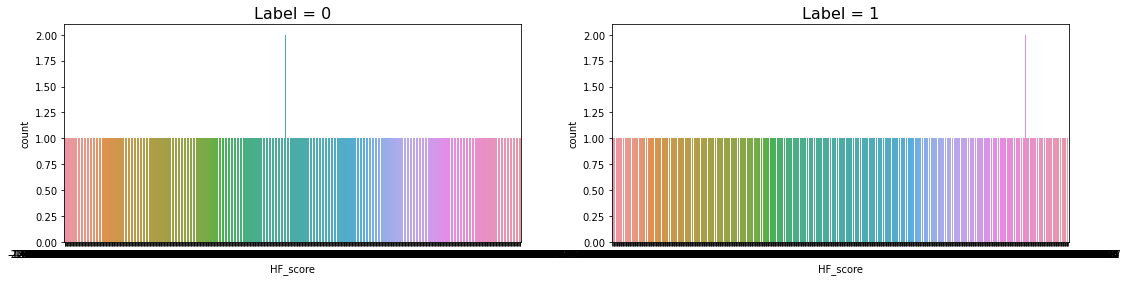

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize = (18, 4))

sns.countplot(x = "HF_score", ax = ax[0], data = merge_hf.loc[merge['Label'] == 0])
ax[0].set_title('Label = 0', fontsize = 16)

sns.countplot(x = "HF_score", ax = ax[1], data = merge_hf.loc[merge['Label'] == 1])
ax[1].set_title('Label = 1', fontsize = 16)

plt.show()

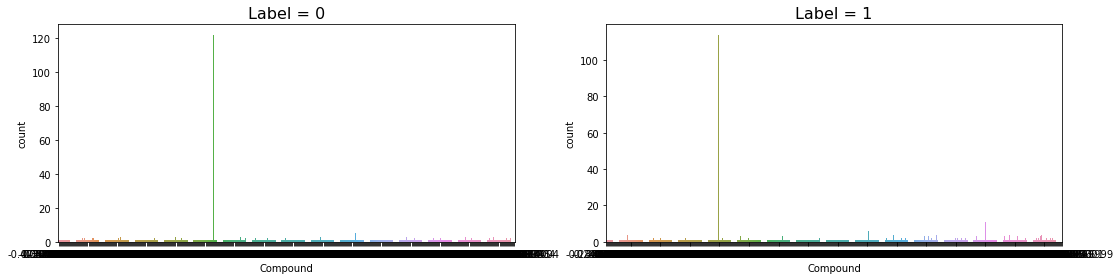

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 4))

sns.countplot(x = "Compound", ax = ax[0], data = merge_vader.loc[merge['Label'] == 0])
ax[0].set_title('Label = 0', fontsize = 16)

sns.countplot(x = "Compound", ax = ax[1], data = merge_vader.loc[merge['Label'] == 1])
ax[1].set_title('Label = 1', fontsize = 16)

plt.show()

In [ ]:
hf_withdum.head(1)

,stock,Date,HF_score,Subjectivity,Polarity,Open,High,Low,Close,Adj Close,Volume,Change,Label,AAPL,FB,GOOGL,NFLX,TSLA
0,AAPL,2020-03-09,-2.695928,0.255556,-0.155556,65.9375,69.522499,65.75,66.542503,65.640526,286744800,71.278069,0,1,0,0,0,0


In [ ]:
vader_withdum.head(1)

,stock,Date,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Open,High,...,Close,Adj Close,Volume,Change,Label,AAPL,FB,GOOGL,NFLX,TSLA
0,AAPL,2020-03-09,0.255556,-0.155556,-0.302067,0.162333,0.812,0.025333,65.9375,69.522499,...,66.542503,65.640526,286744800,71.278069,0,1,0,0,0,0


In [ ]:
withdum.head(1)

,stock,Date,HF_score,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Open,...,Close,Adj Close,Volume,Change,Label,AAPL,FB,GOOGL,NFLX,TSLA
0,AAPL,2020-03-09,-2.695928,0.255556,-0.155556,-0.302067,0.162333,0.812,0.025333,65.9375,...,66.542503,65.640526,286744800,71.278069,0,1,0,0,0,0


#Tensorflow Classification ANN on HF

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf 

In [ ]:
#Create the feature data set
X = hf_withdum
X = np.array(X.drop(['Label','Adj Close','Change', 'Date','stock','Open','High','Low', 'Close','Volume'],1))
#Create the target data set
y = np.array(hf_withdum['Label'])

from sklearn.model_selection import train_test_split
#Split the data into 80% training and 20% testing data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
ann = tf.keras.Sequential([

  tf.keras.layers.Dense(100, activation='relu'), # add 100 dense neurons

  tf.keras.layers.Dense(100, activation='relu'), # add another layer with 10 neurons

  tf.keras.layers.Dense(1, activation='sigmoid')

])

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.5069
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5502
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5374
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5541
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5463
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5433
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5630
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5423
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5600
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5502
Epoch 11/50
32/32 [

In [ ]:
ann.evaluate(x_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.7122 - accuracy: 0.4824


[0.7122263312339783, 0.48235294222831726]

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
pd.DataFrame(list(zip(y_test, y_pred)), columns=['Actual', 'Predicted'])

,Actual,Predicted
0,1,[True]
1,1,[False]
2,1,[False]
3,0,[True]
4,1,[True]
...,...,...
250,0,[False]
251,1,[False]
252,1,[False]
253,1,[True]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[59 63]
 [69 64]]
0.4823529411764706


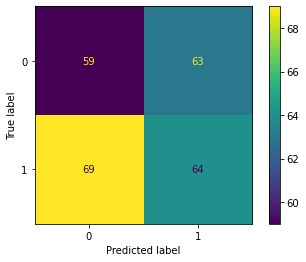

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [ ]:
df2020 = hf_withdum.copy()
df2020.Date = pd.to_datetime(df2020.Date)
#df2020 = df2020.loc[(df2020['Date'] >= '2020-01-01') ]
df2020 = df2020.sort_values(by=['Date'], ascending=True)
df2020

,stock,Date,HF_score,Subjectivity,Polarity,Open,High,Low,Close,Adj Close,Volume,Change,Label,AAPL,FB,GOOGL,NFLX,TSLA
419,NFLX,2017-01-04,-0.086086,0.000000,0.000000,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,127.489998,1,0,0,0,1,0
420,NFLX,2017-01-05,0.004427,0.476490,0.208864,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,129.410004,1,0,0,0,1,0
421,NFLX,2017-01-06,1.260186,0.608939,0.090682,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,131.809998,0,0,0,0,1,0
422,NFLX,2017-01-10,-1.979909,0.335000,0.352500,131.270004,132.220001,129.289993,129.889999,129.889999,5985800,130.949997,0,0,0,0,1,0
423,NFLX,2017-01-11,1.799215,0.125000,0.125000,130.910004,131.500000,129.250000,130.500000,130.500000,5615100,129.889999,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,AAPL,2020-03-30,-0.058686,0.266667,0.040625,62.685001,63.880001,62.349998,63.702499,62.839020,167976400,61.095478,1,1,0,0,0,0
1085,NFLX,2020-03-30,0.008427,0.162771,0.036472,363.000000,377.799988,361.170013,370.959991,370.959991,8622000,357.119995,1,0,0,0,1,0
43,FB,2020-03-30,0.905252,0.165108,0.014589,159.179993,166.750000,158.059998,165.949997,165.949997,22515200,156.789993,1,0,1,0,0,0
418,GOOGL,2020-03-30,-2.963462,0.166667,0.166667,1132.640015,1151.000000,1098.489990,1146.310059,1146.310059,2936800,1110.260010,1,0,0,1,0,0


In [ ]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[63 59]
 [50 83]]
0.5725490196078431


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:linear")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_squared_error(y_test, y_pred))
    
display_scores(np.sqrt(scores))

[20:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Scores: [0.51726535 0.49355181 0.50141963 0.51259126 0.49743961]
Mean: 0.504
Std: 0.009


# Tensorflow Classification ANN on Vader

In [ ]:
#Create the feature data set
X = vader_withdum
X = np.array(X.drop(['Label','Adj Close','Change', 'Date','stock','Open','High','Low', 'Close','Volume'],1))
#Create the target data set
y = np.array(vader_withdum['Label'])

from sklearn.model_selection import train_test_split
#Split the data into 80% training and 20% testing data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
ann = tf.keras.Sequential([

  tf.keras.layers.Dense(100, activation='relu'), # add 100 dense neurons

  tf.keras.layers.Dense(100, activation='relu'), # add another layer with 100 neurons

  tf.keras.layers.Dense(1, activation='sigmoid')

])

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
32/32 [==============================] - 1s 3ms/step - loss: 0.6960 - accuracy: 0.4990
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5492
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5354
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.5856
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.5472
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.5768
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5719
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.5669
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.5758
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6692 - accuracy: 0.5965
Epoch 11/50
32/32 [

In [ ]:
ann.evaluate(x_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.7247 - accuracy: 0.5098


[0.7247365117073059, 0.5098039507865906]

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
pd.DataFrame(list(zip(y_test, y_pred)), columns=['Actual', 'Predicted'])

,Actual,Predicted
0,1,[True]
1,1,[True]
2,1,[True]
3,0,[False]
4,1,[False]
...,...,...
250,0,[False]
251,1,[True]
252,1,[False]
253,1,[False]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[57 65]
 [60 73]]
0.5098039215686274


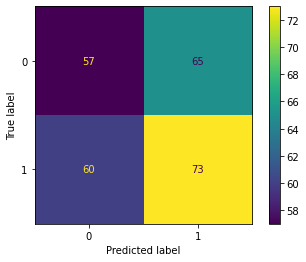

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [ ]:
df2020 = vader_withdum.copy()
df2020.Date = pd.to_datetime(df2020.Date)
#df2020 = df2020.loc[(df2020['Date'] >= '2020-01-01') ]
df2020 = df2020.sort_values(by=['Date'], ascending=True)
df2020

,stock,Date,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Open,High,...,Close,Adj Close,Volume,Change,Label,AAPL,FB,GOOGL,NFLX,TSLA
419,NFLX,2017-01-04,0.000000,0.000000,0.148000,0.000000,0.922500,0.077500,127.489998,130.169998,...,129.410004,129.410004,7843600,127.489998,1,0,0,0,1,0
420,NFLX,2017-01-05,0.476490,0.208864,0.460450,0.080500,0.662500,0.257000,129.220001,132.750000,...,131.809998,131.809998,10185500,129.410004,1,0,0,0,1,0
421,NFLX,2017-01-06,0.608939,0.090682,0.000000,0.000000,1.000000,0.000000,132.080002,133.880005,...,131.070007,131.070007,10657900,131.809998,0,0,0,0,1,0
422,NFLX,2017-01-10,0.335000,0.352500,0.185700,0.098750,0.693500,0.207750,131.270004,132.220001,...,129.889999,129.889999,5985800,130.949997,0,0,0,0,1,0
423,NFLX,2017-01-11,0.125000,0.125000,0.169750,0.000000,0.872000,0.128000,130.910004,131.500000,...,130.500000,130.500000,5615100,129.889999,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,AAPL,2020-03-30,0.266667,0.040625,0.152100,0.035750,0.873000,0.091250,62.685001,63.880001,...,63.702499,62.839020,167976400,61.095478,1,1,0,0,0,0
1085,NFLX,2020-03-30,0.162771,0.036472,0.723700,0.000000,0.713000,0.287000,363.000000,377.799988,...,370.959991,370.959991,8622000,357.119995,1,0,0,0,1,0
43,FB,2020-03-30,0.165108,0.014589,0.047140,0.090200,0.867400,0.042400,159.179993,166.750000,...,165.949997,165.949997,22515200,156.789993,1,0,1,0,0,0
418,GOOGL,2020-03-30,0.166667,0.166667,-0.085500,0.102667,0.829000,0.068333,1132.640015,1151.000000,...,1146.310059,1146.310059,2936800,1110.260010,1,0,0,1,0,0


In [ ]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[64 58]
 [65 68]]
0.5176470588235295


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:linear")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_squared_error(y_test, y_pred))
    
display_scores(np.sqrt(scores))

[20:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Scores: [0.51041036 0.49375081 0.49584328 0.51977101 0.49386133]
Mean: 0.503
Std: 0.011


# Tensorflow Classification ANN on both

In [ ]:
#Create the feature data set
X = withdum
X = np.array(X.drop(['Label','Adj Close','Change', 'Date','stock','Open','High','Low', 'Close','Volume'],1))
#Create the target data set
y = np.array(withdum['Label'])

from sklearn.model_selection import train_test_split
#Split the data into 80% training and 20% testing data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
ann = tf.keras.Sequential([

  tf.keras.layers.Dense(100, activation='relu'), # add 100 dense neurons

  tf.keras.layers.Dense(100, activation='relu'), # add another layer with 10 neurons

  tf.keras.layers.Dense(1, activation='sigmoid')

])

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
32/32 [==============================] - 1s 3ms/step - loss: 0.6954 - accuracy: 0.5098
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5620
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5531
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.5866
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5679
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5689
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.5846
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5974
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6033
Epoch 10/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.6093
Epoch 11/50
32/32 [

In [ ]:
ann.evaluate(x_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.7418 - accuracy: 0.4784


[0.7418302297592163, 0.47843137383461]

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
pd.DataFrame(list(zip(y_test, y_pred)), columns=['Actual', 'Predicted'])

,Actual,Predicted
0,1,[True]
1,1,[False]
2,1,[True]
3,0,[False]
4,1,[True]
...,...,...
250,0,[False]
251,1,[False]
252,1,[False]
253,1,[True]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[57 65]
 [68 65]]
0.47843137254901963


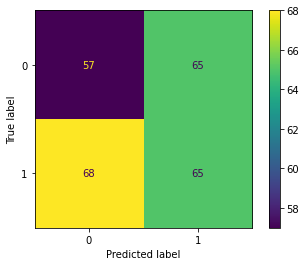

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [ ]:
df2020 = withdum.copy()
df2020.Date = pd.to_datetime(df2020.Date)
#df2020 = df2020.loc[(df2020['Date'] >= '2020-01-01') ]
df2020 = df2020.sort_values(by=['Date'], ascending=True)
df2020

,stock,Date,HF_score,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Open,...,Close,Adj Close,Volume,Change,Label,AAPL,FB,GOOGL,NFLX,TSLA
419,NFLX,2017-01-04,-0.086086,0.000000,0.000000,0.148000,0.000000,0.922500,0.077500,127.489998,...,129.410004,129.410004,7843600,127.489998,1,0,0,0,1,0
420,NFLX,2017-01-05,0.004427,0.476490,0.208864,0.460450,0.080500,0.662500,0.257000,129.220001,...,131.809998,131.809998,10185500,129.410004,1,0,0,0,1,0
421,NFLX,2017-01-06,1.260186,0.608939,0.090682,0.000000,0.000000,1.000000,0.000000,132.080002,...,131.070007,131.070007,10657900,131.809998,0,0,0,0,1,0
422,NFLX,2017-01-10,-1.979909,0.335000,0.352500,0.185700,0.098750,0.693500,0.207750,131.270004,...,129.889999,129.889999,5985800,130.949997,0,0,0,0,1,0
423,NFLX,2017-01-11,1.799215,0.125000,0.125000,0.169750,0.000000,0.872000,0.128000,130.910004,...,130.500000,130.500000,5615100,129.889999,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,AAPL,2020-03-30,-0.058686,0.266667,0.040625,0.152100,0.035750,0.873000,0.091250,62.685001,...,63.702499,62.839020,167976400,61.095478,1,1,0,0,0,0
1085,NFLX,2020-03-30,0.008427,0.162771,0.036472,0.723700,0.000000,0.713000,0.287000,363.000000,...,370.959991,370.959991,8622000,357.119995,1,0,0,0,1,0
43,FB,2020-03-30,0.905252,0.165108,0.014589,0.047140,0.090200,0.867400,0.042400,159.179993,...,165.949997,165.949997,22515200,156.789993,1,0,1,0,0,0
418,GOOGL,2020-03-30,-2.963462,0.166667,0.166667,-0.085500,0.102667,0.829000,0.068333,1132.640015,...,1146.310059,1146.310059,2936800,1110.260010,1,0,0,1,0,0


In [ ]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[61 61]
 [55 78]]
0.5450980392156862


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:linear")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_squared_error(y_test, y_pred))
    
display_scores(np.sqrt(scores))

[20:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Scores: [0.50774183 0.49106922 0.49859802 0.51907745 0.48649405]
Mean: 0.501
Std: 0.012
